<a href="https://colab.research.google.com/github/Bensayah/Advanced_ML/blob/main/Infectious_Disease_Modelling_Beyond_the_Basic_SIR_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Infectious Disease Modelling: Beyond the Basic SIR Model

## SIR model

## System of EDO mathematical model

In [ ]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
!pip install mpld3
import mpld3
mpld3.enable_notebook()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 201 kB 5.0 MB/s 


In [ ]:
def deriv(y, t, N, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

In [ ]:
N = 1000
beta = 1.0  # infected person infects 1 other person per day
D = 4.0 # infections lasts four days
gamma = 1.0/D

S0, I0, R0 = 999, 1, 0  # initial conditions: one infected, rest susceptible

In [ ]:
t = np.linspace(0, 49, 50) # Grid of time points (in days)
y0 = S0, I0, R0 # Initial conditions vector

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma))
S, I, R = ret.T

In [ ]:
def plotsir(t, S, I, R):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, I, 'y', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')

  ax.set_xlabel('Time (days)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend()
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  plt.show();

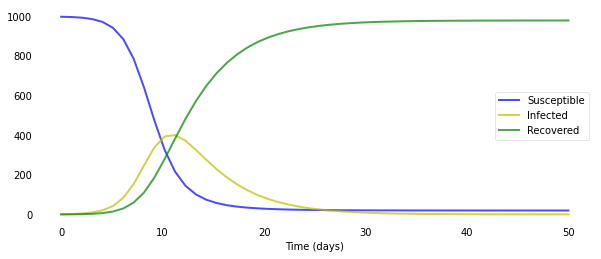

In [ ]:
plotsir(t, S, I, R)

## Modeling by a system of fractional derivative equations

### Tricked ide.py to handle the kernel:  $s^{(p-1)}(t-s)^{(q-1)}, p,q > 1$.

- add the line: 
import scipy as sc
- replace the line: 
self.quad_x, self.quad_w = np.polynomial.legendre.leggauss(quad_deg)

> by 

> self.quad_x, self.quad_w = sc.special.roots_jacobi(quad_deg,q-1,p-1)

- replace the line: return self.quad_w * x / 2
> by

> return self.quad_w * (x / 2)**(p+q-1)
- declare the function K = 1 i.e., 

> def kernel(x, s):
>>    return 1





          

In [1]:
!pip install deepxde
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
from deepxde.backend import tf

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Using backend: tensorflow.compat.v1

Instructions for updating:
non-resource variables are not supported in the long term



Compiling model...
Building feed-forward neural network...
'build' took 0.139064 s



/usr/local/lib/python3.8/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.990753 s

Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [7.47e+05, 7.22e+05, 5.81e+02, 0.00e+00, 0.00e+00, 0.00e+00]    [7.47e+05, 7.22e+05, 5.81e+02, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1000      [2.25e+02, 3.05e+00, 3.63e+02, 0.00e+00, 0.00e+00, 0.00e+00]    [2.25e+02, 3.05e+00, 3.63e+02, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2000      [7.23e+01, 5.72e+01, 3.40e+02, 0.00e+00, 0.00e+00, 0.00e+00]    [7.23e+01, 5.72e+01, 3.40e+02, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3000      [7.02e+01, 5.61e+01, 3.13e+02, 0.00e+00, 0.00e+00, 0.00e+00]    [7.02e+01, 5.61e+01, 3.13e+02, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4000      [6.72e+01, 5.42e+01, 2.85e+02, 0.00e+00, 0.00e+00, 0.00e+00]    [6.72e+01, 5.42e+01, 2.85e+02, 0.00e+00, 0.00e+00, 0.00e+00]    []  
5000      [6.26e+01, 5.12e+01, 2.53e+02, 0.00e+00, 0.00e+00, 0.

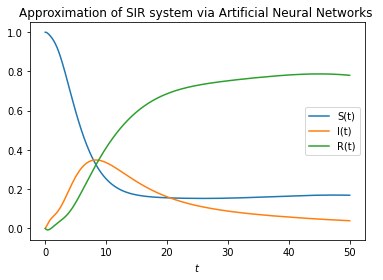

In [2]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
# Import torch if using backend pytorch
# import torch
# Import paddle if using backend paddle
# import paddle

from scipy.special import gamma

# constants
Nb = 1
beta = 1  # infected person infects 1 other person per day 0.8
D = 4.0 # infections lasts four days
gamm = 0.25 # 0.05

S0, I0, R0 =  0.999, 0.001, 0  # initial conditions: one infected, rest susceptible
# right hand side functions
G1 = lambda S,I,R: - beta * S * I/Nb
G2 = lambda S,I,R: beta * S * I/Nb - gamm * I 
G3 = lambda S,I,R: gamm * I
# definitions of parameters interval [0,T]
T=50
N=1000
h=T/N
pp=1;qq=0.8
X = np.arange(0, T, h).reshape(N,1)
c = pp/gamma(qq) 
def ide(x, y, int_mat):
    y1=y[:,0:1]
    y2=y[:,1:2]
    y3=y[:,2:3]
    rhs1 = tf.matmul(int_mat, G1(y1,y2,y3))
    rhs2 = tf.matmul(int_mat, G2(y1,y2,y3))
    rhs3 = tf.matmul(int_mat, G3(y1,y2,y3))
    eq1 = y1[: tf.size(rhs1)] - S0 - c*rhs1
    eq2 = y2[: tf.size(rhs2)] - I0 - c*rhs2 
    eq3 = y3[: tf.size(rhs3)] - R0 - c*rhs3
    
    #return [eq1,eq2,eq3]
    return [eq1,eq2,eq3]

def kernel(x, s):
    return 1
#def boundary(_, on_initial):
#    return on_initial
def boundary(x, on_initial):
    return on_initial and np.isclose(x[0], 0)
def func(x):
    return np.exp(-x) * np.cosh(x)


geom = dde.geometry.TimeDomain(0, 50)
#ic = dde.icbc.IC(geom, lambda x: 1, boundary, component=0)

#ic = dde.icbc.IC(geom,func, lambda _, on_initial: on_initial)
#ic1 = dde.icbc.IC(geom, lambda x: 1000, boundary, component=0)
#ic2 = dde.icbc.IC(geom, lambda x: 0.001, boundary, component=1)
ic1 = dde.icbc.IC(geom, lambda x: S0, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda x: I0, boundary, component=1)
ic3 = dde.icbc.IC(geom, lambda x: R0, boundary, component=2)

quad_deg = 20
data = dde.data.IDE(
    geom,
    ide,
    #ic,
    [ic1,ic2,ic3],
    #[],
    quad_deg,
    kernel=kernel,
    num_domain=100,
    num_boundary=2,
    train_distribution="uniform",
    num_test=None
)

layer_size = [1] + [20] * 5 + [3]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

def output_transform(x, y):
    y1=y[:,0:1]
    y2=y[:,1:2]
    y3=y[:,2:3]
    u=x*y1+0.999
    v=x*y2+0.001
    w=x*y3
    #w=1000-u-v
    return  tf.concat((u, v, w), axis=1) 

net.apply_output_transform(output_transform)

model = dde.Model(data, net)

model.compile("adam", lr=0.00001,loss_weights=[0.1,0.1,0.1,0.1,1,0.1])
#losshistory, train_state = model.train(iterations=1000)
#model.compile("adam", lr=0.001,loss_weights=[0.01,0.1,0.1])
losshistory, train_state = model.train(iterations=200000)
#model.compile("L-BFGS",loss_weights=[0.1,0.1,0.1, 0.1,1,0.1])
#losshistory, train_state = model.train()
#model.compile("L-BFGS")
#losshistory, train_state = model.train()

X = geom.uniform_points(1000)
y_true = func(X)
y_pred = model.predict(X)
#print("L2 relative error:", dde.metrics.l2_relative_error(y_true, y_pred))

plt.figure()
#plt.plot(X, y_true, "-")
#plt.plot(X, y_pred, "--")
plt.plot(X, y_pred[:,0],label='S(t)')
plt.plot(X, y_pred[:,1], label='I(t)')
plt.plot(X, y_pred[:,2], label='R(t)')
plt.legend(loc='right')
plt.xlabel('$t$')
plt.title('Approximation of SIR system via Artificial Neural Networks ')
#plt.plot(X,Y1,X,Y2)
plt.show()
#np.savetxt("test.dat", np.hstack((X, y_true, y_pred)))

In [ ]:
c


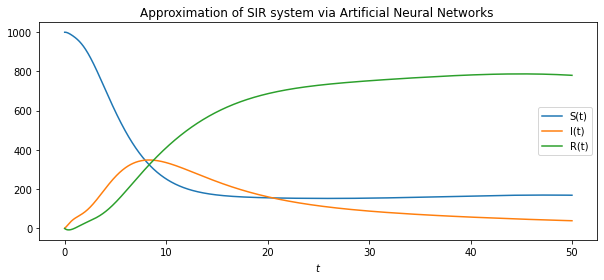

In [3]:
plt.figure(figsize=(10,4))
#plt.plot(X, y_true, "-")
#plt.plot(X, y_pred, "--")
plt.plot(X, 1000*y_pred[:,0],label='S(t)')
plt.plot(X, 1000*y_pred[:,1], label='I(t)')
plt.plot(X, 1000*y_pred[:,2], label='R(t)')
plt.legend(loc='right')
plt.xlabel('$t$')
plt.title('Approximation of SIR system via Artificial Neural Networks ')
#plt.plot(X,Y1,X,Y2)
plt.show()
#np.savetxt("test.dat", np.hstack((X, y_true, y_pred)))

Compiling model...
Building feed-forward neural network...
'build' took 0.094722 s



/usr/local/lib/python3.8/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 2.076806 s

Initializing variables...
Training model...

Step      Train loss                                                      Test loss                                                       Test metric
0         [9.87e-02, 1.06e+01, 3.43e+00, 9.98e-02, 1.00e+02, 6.40e+00]    [9.87e-02, 1.06e+01, 3.43e+00, 0.00e+00, 0.00e+00, 0.00e+00]    []  
1000      [6.46e-06, 3.01e+00, 1.16e-01, 3.49e-06, 9.74e-06, 9.44e-04]    [6.46e-06, 3.01e+00, 1.16e-01, 0.00e+00, 0.00e+00, 0.00e+00]    []  
2000      [1.76e-05, 1.28e-01, 1.45e-02, 6.44e-11, 4.57e-07, 1.93e-05]    [1.76e-05, 1.28e-01, 1.45e-02, 0.00e+00, 0.00e+00, 0.00e+00]    []  
3000      [2.23e-06, 1.81e-02, 1.39e-03, 3.38e-10, 1.63e-05, 1.27e-06]    [2.23e-06, 1.81e-02, 1.39e-03, 0.00e+00, 0.00e+00, 0.00e+00]    []  
4000      [3.51e-07, 1.16e-02, 1.39e-03, 3.26e-10, 1.73e-05, 4.83e-07]    [3.51e-07, 1.16e-02, 1.39e-03, 0.00e+00, 0.00e+00, 0.00e+00]    []  
5000      [2.08e-07, 9.71e-03, 7.88e-03, 1.83e-09, 7.92e-05, 4.

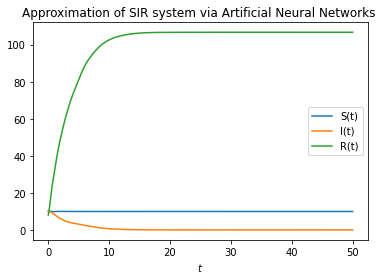

In [ ]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
# Import torch if using backend pytorch
# import torch
# Import paddle if using backend paddle
# import paddle

from scipy.special import gamma

# constants
Nb = 1000
beta = 1.0  # infected person infects 1 other person per day
D = 4.0 # infections lasts four days
gamm = 1.0/D
# origine sysytem before scaling
S_0, I_0, R_0 = 999, 1, 0  # initial conditions: one infected, rest susceptible
# right hand side functions
G_1 = lambda St,It,Rt: -beta * St * It/Nb
G_2 = lambda St,It,Rt: beta * St * It/Nb - gamm * It 
G_3 = lambda St,It,Rt: gamm * It
# scaled system
S0, I0, R0 = 9.99, 10, 8  # initial conditions: one infected, rest susceptible
# right hand side functions
G1 = lambda S,I,R: -0.1*beta * S * I/Nb
G2 = lambda S,I,R: 0.01*beta * S * I/Nb - gamm * I 
G3 = lambda S,I,R: 10*gamm * I
# definitions of parameters interval [0,T]
T=50
N=1000
h=T/N
pp=1;qq=1
X = np.arange(0, T, h).reshape(N,1)
c = pp/gamma(qq) 
def ide(x, y, int_mat):
    y1=y[:,0:1]
    y2=y[:,1:2]
    y3=y[:,2:3]
    rhs1 = tf.matmul(int_mat, G1(y1,y2,y3))
    rhs2 = tf.matmul(int_mat, G2(y1,y2,y3))
    rhs3 = tf.matmul(int_mat, G3(y1,y2,y3))
    eq1 = y1[: tf.size(rhs1)] - S0 - c*rhs1
    eq2 = y2[: tf.size(rhs2)] - I0 - c*rhs2 
    eq3 = y3[: tf.size(rhs3)] - R0 - c*rhs3
    #eq4 = (y1[0]-1)**2
    
    return [eq1,eq2,eq3]

def kernel(x, s):
    return 1
#def boundary(_, on_initial):
#    return on_initial
def boundary(x, on_initial):
    return on_initial and np.isclose(x[0], 0)
def func(x):
    return np.exp(-x) * np.cosh(x)


geom = dde.geometry.TimeDomain(0, 50)
#ic = dde.icbc.IC(geom, lambda x: 1, boundary, component=0)

#ic = dde.icbc.IC(geom,func, lambda _, on_initial: on_initial)
#ic1 = dde.icbc.IC(geom, lambda x: 1000, boundary, component=0)
#ic2 = dde.icbc.IC(geom, lambda x: 0.001, boundary, component=1)
ic1 = dde.icbc.IC(geom, lambda x: S0, boundary, component=0)
ic2 = dde.icbc.IC(geom, lambda x: I0, boundary, component=1)
ic3 = dde.icbc.IC(geom, lambda x: R0, boundary, component=2)

quad_deg = 20
data = dde.data.IDE(
    geom,
    ide,
    #ic,
    [ic1,ic2,ic3],
    #[],
    quad_deg,
    kernel=kernel,
    num_domain=1000,
    num_boundary=2,
    train_distribution="uniform",
    num_test=None
)

layer_size = [1] + [20] * 3 + [3]
activation = "tanh"
initializer = "Glorot uniform"
net = dde.nn.FNN(layer_size, activation, initializer)

def output_transform(x, y):
    y1=y[:,0:1]
    y2=y[:,1:2]
    y3=y[:,2:3]
    return x *  y2 

#net.apply_output_transform(output_transform)

model = dde.Model(data, net)

model.compile("adam", lr=0.01,loss_weights=[0.001,0.1,0.1,0.001,1,0.1])
#losshistory, train_state = model.train(iterations=1000)
#model.compile("adam", lr=0.001,loss_weights=[0.01,0.1,0.1])
losshistory, train_state = model.train(iterations=10000)
#model.compile("L-BFGS",loss_weights=[0.01,0.1,0.1, 0.01,0.1, 0.1])
#losshistory, train_state = model.train()
#model.compile("L-BFGS")
#losshistory, train_state = model.train()

X = geom.uniform_points(1000)
y_true = func(X)
y_pred = model.predict(X)
#print("L2 relative error:", dde.metrics.l2_relative_error(y_true, y_pred))

plt.figure()
#plt.plot(X, y_true, "-")
#plt.plot(X, y_pred, "--")
plt.plot(X, y_pred[:,0],label='S(t)')
plt.plot(X, y_pred[:,1], label='I(t)')
plt.plot(X, y_pred[:,2], label='R(t)')
plt.legend(loc='right')
plt.xlabel('$t$')
plt.title('Approximation of SIR system via Artificial Neural Networks ')
#plt.plot(X,Y1,X,Y2)
plt.show()
#np.savetxt("test.dat", np.hstack((X, y_true, y_pred)))

Using backend: tensorflow.compat.v1

Instructions for updating:
non-resource variables are not supported in the long term



Compiling model...
Building feed-forward neural network...
'build' took 0.078838 s



/usr/local/lib/python3.8/dist-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:103: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(


'compile' took 0.812554 s

Initializing variables...
Training model...

Step      Train loss    Test loss     Test metric   
0         [6.73e+01]    [6.71e+01]    [4.82e-01]    
1000      [3.08e+01]    [3.07e+01]    [1.10e-01]    
2000      [2.81e+01]    [2.82e+01]    [7.37e-02]    
3000      [1.25e+01]    [1.28e+01]    [2.89e-02]    
4000      [1.20e+01]    [1.23e+01]    [2.92e-02]    
5000      [9.84e+00]    [1.01e+01]    [3.31e-02]    
6000      [4.40e+00]    [5.05e+00]    [2.00e-02]    
7000      [9.46e-01]    [1.32e+00]    [4.49e-03]    
8000      [4.85e-02]    [8.95e-02]    [2.00e-03]    
9000      [9.09e-03]    [2.08e-02]    [5.13e-04]    
10000     [3.76e-03]    [9.02e-03]    [2.08e-04]    
11000     [1.97e-03]    [4.78e-03]    [1.10e-04]    
12000     [1.08e-03]    [2.60e-03]    [4.63e-05]    
13000     [6.33e-04]    [1.45e-03]    [1.02e-04]    
14000     [3.82e-04]    [8.62e-04]    [4.22e-05]    
15000     [2.52e-04]    [5.49e-04]    [1.87e-04]    
16000     [1.57e-04]    [3.

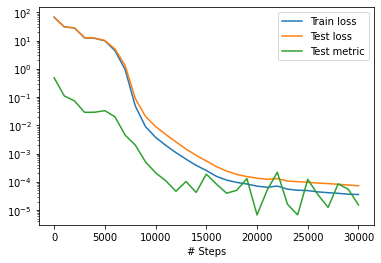

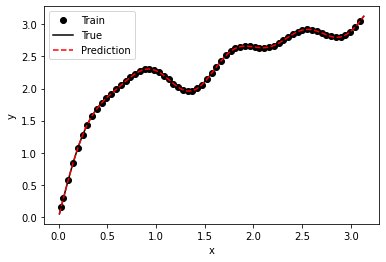

In [ ]:
"""Backend supported: tensorflow.compat.v1, tensorflow, paddle"""
import deepxde as dde
import numpy as np

geom = dde.geometry.Interval(0, np.pi)


# Define sine function
if dde.backend.backend_name in ["tensorflow.compat.v1", "tensorflow"]:
    from deepxde.backend import tf

    sin = tf.sin
elif dde.backend.backend_name == "paddle":
    import paddle

    sin = paddle.sin


def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    summation = sum([i * sin(i * x) for i in range(1, 5)])
    return -dy_xx - summation - 8 * sin(8 * x)

def func(x):
    summation = sum([np.sin(i * x) / i for i in range(1, 5)])
    return x + summation + np.sin(8 * x) / 8

data = dde.data.PDE(geom, pde, [], num_domain=64, solution=func, num_test=400)

layer_size = [1] + [50] * 3 + [1]
activation = 'tanh'
initializer = 'Glorot uniform'
net = dde.nn.FNN(layer_size, activation, initializer)

def output_transform(x, y):
    return x * (np.pi - x) * y + x 

net.apply_output_transform(output_transform)

model = dde.Model(data, net)
model.compile("adam", lr=1e-4, decay=("inverse time", 1000, 0.3), metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=30000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

In [ ]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch, paddle"""
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
from scipy import integrate
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
# Import torch if using backend pytorch
# import torch
# Import paddle if using backend paddle
# import paddle

ub = 200
rb = 20


def func(t, r):
    x, y = r
    dx_t = 1 / ub * rb * (2.0 * ub * x - 0.04 * ub * x * ub * y)
    dy_t = 1 / ub * rb * (0.02 * ub * x * ub * y - 1.06 * ub * y)
    return dx_t, dy_t


def gen_truedata():
    t = np.linspace(0, 1, 100)

    sol = integrate.solve_ivp(func, (0, 10), (100 / ub, 15 / ub), t_eval=t)
    x_true, y_true = sol.y
    x_true = x_true.reshape(100, 1)
    y_true = y_true.reshape(100, 1)

    return x_true, y_true


def ode_system(x, y):
    r = y[:, 0:1]
    p = y[:, 1:2]
    dr_t = dde.grad.jacobian(y, x, i=0)
    dp_t = dde.grad.jacobian(y, x, i=1)
    return [
        dr_t - 1 / ub * rb * (2.0 * ub * r - 0.04 * ub * r * ub * p),
        dp_t - 1 / ub * rb * (0.02 * r * ub * p * ub - 1.06 * p * ub),
    ]


geom = dde.geometry.TimeDomain(0.0, 1.0)
data = dde.data.PDE(geom, ode_system, [], 3000, 2, num_test=3000)

layer_size = [1] + [64] * 6 + [2]
activation = "tanh"
initializer = "Glorot normal"
net = dde.nn.FNN(layer_size, activation, initializer)

# Backend tensorflow.compat.v1 or tensorflow
def input_transform(t):
    return tf.concat(
        (
            t,
            tf.sin(t),
            tf.sin(2 * t),
            tf.sin(3 * t),
            tf.sin(4 * t),
            tf.sin(5 * t),
            tf.sin(6 * t),
        ),
        axis=1,
    )
# Backend pytorch
# def input_transform(t):
#     return torch.cat(
#         [
#             torch.sin(t),
#         ],
#         dim=1,
#     )
# Backend paddle
# def input_transform(t):
#     return paddle.concat(
#         (
#             t,
#             paddle.sin(t),
#             paddle.sin(2 * t),
#             paddle.sin(3 * t),
#             paddle.sin(4 * t),
#             paddle.sin(5 * t),
#             paddle.sin(6 * t),
#         ),
#         axis=1,
#     )

# hard constraints: x(0) = 100, y(0) = 15
# Backend tensorflow.compat.v1 or tensorflow
def output_transform(t, y):
    y1 = y[:, 0:1]
    y2 = y[:, 1:2]
    return tf.concat([y1 * tf.tanh(t) + 100 / ub, y2 * tf.tanh(t) + 15 / ub], axis=1)
# Backend pytorch
# def output_transform(t, y):
#     y1 = y[:, 0:1]
#     y2 = y[:, 1:2]
#     return torch.cat([y1 * torch.tanh(t) + 100 / ub, y2 * torch.tanh(t) + 15 / ub], dim=1)
# Backend paddle
# def output_transform(t, y):
#     y1 = y[:, 0:1]
#     y2 = y[:, 1:2]
#     return paddle.cat([y1 * paddle.tanh(t) + 100 / ub, y2 * paddle.tanh(t) + 15 / ub], axis=1)

net.apply_feature_transform(input_transform)
net.apply_output_transform(output_transform)
model = dde.Model(data, net)

model.compile("adam", lr=0.001)
losshistory, train_state = model.train(iterations=1000)
model.compile("L-BFGS")
losshistory, train_state = model.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

plt.xlabel("t")
plt.ylabel("population")

t = np.linspace(0, 1, 100)
x_true, y_true = gen_truedata()
plt.plot(t, x_true, color="black", label="x_true")
plt.plot(t, y_true, color="blue", label="y_true")

t = t.reshape(100, 1)
sol_pred = model.predict(t)
x_pred = sol_pred[:, 0:1]
y_pred = sol_pred[:, 1:2]

plt.plot(t, x_pred, color="red", linestyle="dashed", label="x_pred")
plt.plot(t, y_pred, color="orange", linestyle="dashed", label="y_pred")
plt.legend()
plt.show()